<a href="https://colab.research.google.com/github/Shuvamjoy34/NumberCrunchers/blob/master/CNN_car_vs_bike_vs_random_Image_Classification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.keras import balanced_batch_generator

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
data=[]
labels=[]
car=os.listdir("/content/drive/My Drive/Images/car/")
for a in car:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/car/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((128, 128))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

bike=os.listdir("/content/drive/My Drive/Images/bike/")
for b in bike:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/bike/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((128,128))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
random=os.listdir("/content/drive/My Drive/Images/random/")
for c in random:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/random/"+c)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((128, 128))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")

In [170]:
images=np.array(data)
labels=np.array(labels)

In [171]:
s=np.arange(images.shape[0])
np.random.shuffle(s)
images=images[s]
labels=labels[s]
num_classes=len(np.unique(labels))
len_data=len(images)

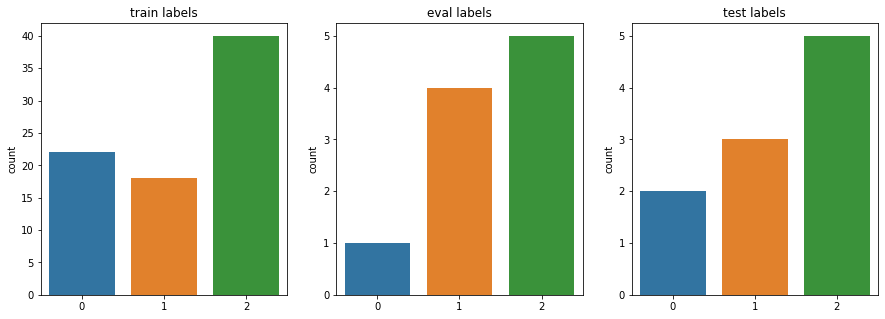

In [172]:
images =images.astype(np.float32)
images = images/255

train_x , x , train_y , y = train_test_split(images , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [173]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)
eval_y = lb.transform(eval_y)


In [174]:
from tensorflow.python.keras import regularizers
from keras.layers.normalization import BatchNormalization


In [175]:
#BasicConvNet
classifier = Sequential()

classifier.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))
#keras.layers.BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.05)))
#keras.layers.BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.05)))
#keras.layers.BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Dropout(0.3))


classifier.add(Flatten())

classifier.add(Dense(500,activation="relu"))

classifier.add(Dropout(0.3))



classifier.add(Dense(3,activation="softmax"))#2 represent output layer neurons 

classifier.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 14, 14, 64)      

In [ ]:
! pip install keras

In [176]:
#from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("convnet_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)

classifier.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
shuvam= classifier.fit(train_x,train_y,batch_size = 32,epochs=200,verbose=1,validation_data=(eval_x, eval_y))
shuvam

Epoch 1/200
3/3 [==============================] - 0s 97ms/step - loss: 5.7863 - accuracy: 0.3750 - val_loss: 4.5518 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 4.4410 - accuracy: 0.4000 - val_loss: 4.1555 - val_accuracy: 0.5000
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 4.0296 - accuracy: 0.6000 - val_loss: 3.6225 - val_accuracy: 0.9000
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 3.6635 - accuracy: 0.7375 - val_loss: 3.2708 - val_accuracy: 0.9000
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 3.2460 - accuracy: 0.8750 - val_loss: 2.8987 - val_accuracy: 0.9000
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 2.9253 - accuracy: 0.8875 - val_loss: 2.6248 - val_accuracy: 1.0000
Epoch 7/200
3/3 [==============================] - 0s 16ms/step - loss: 2.6454 - accuracy: 0.9625 - val_loss: 2.3841 - val_accuracy: 1.0000
Epoch 8/200
3/3 [===

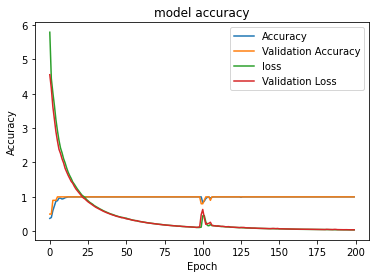

In [177]:
import matplotlib.pyplot as plt
plt.plot(shuvam.history["accuracy"])
plt.plot(shuvam.history['val_accuracy'])
plt.plot(shuvam.history['loss'])
plt.plot(shuvam.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array 
from keras import regularizers
from keras import optimizers
from keras.models import load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen= ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow(train_x,train_y, batch_size=32)
val_gen = val_datagen.flow(eval_x,eval_y, batch_size=32)
test_gen = val_datagen.flow(test_x,test_y, batch_size =32, shuffle = False)

In [ ]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=val_gen.n//val_gen.batch_size
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size
ep = 100
classifier.fit_generator(generator = train_gen, validation_data= val_gen,
                           steps_per_epoch=STEP_SIZE_TRAIN, epochs=ep, 
                           validation_steps=STEP_SIZE_VALID)

Epoch 1/100
2/2 [==============================] - 0s 146ms/step - loss: 4.8851 - accuracy: 0.4583
Epoch 2/100
2/2 [==============================] - 0s 244ms/step - loss: 2.0396 - accuracy: 0.4167
Epoch 3/100
2/2 [==============================] - 0s 133ms/step - loss: 1.8759 - accuracy: 0.4583
Epoch 4/100
2/2 [==============================] - 0s 130ms/step - loss: 1.2548 - accuracy: 0.5208
Epoch 5/100
2/2 [==============================] - 0s 237ms/step - loss: 1.0878 - accuracy: 0.5417
Epoch 6/100
2/2 [==============================] - 0s 244ms/step - loss: 1.1213 - accuracy: 0.4688
Epoch 7/100
2/2 [==============================] - 0s 239ms/step - loss: 1.1590 - accuracy: 0.4792
Epoch 8/100
2/2 [==============================] - 0s 239ms/step - loss: 1.1515 - accuracy: 0.6250
Epoch 9/100
2/2 [==============================] - 0s 234ms/step - loss: 1.1555 - accuracy: 0.4844
Epoch 10/100
2/2 [==============================] - 0s 237ms/step - loss: 1.1645 - accuracy: 0.4583
Epoch 11/

In [178]:
#Once the model is trained we can evaluate it on Test data.

# Evaluating the model 
score = classifier.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.35637736320495605
Test accuracy: 0.8999999761581421


In [179]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = classifier.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))

                 precision    recall  f1-score   support

   class 0(car)       1.00      0.50      0.67         2
  class 1(bike)       1.00      1.00      1.00         3
class 2(random)       0.83      1.00      0.91         5

       accuracy                           0.90        10
      macro avg       0.94      0.83      0.86        10
   weighted avg       0.92      0.90      0.89        10

[[1 0 1]
 [0 3 0]
 [0 0 5]]


In [181]:

#AlexNet
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
   # keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
])

In [118]:

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 62, 62, 96)        34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 62, 62, 96)        384       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 256)       1024      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 384)      

In [182]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("alexnet_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])



lizon=model.fit(train_x,train_y,batch_size = 32,epochs=200,verbose=1,validation_data=(eval_x, eval_y),callbacks=[checkpoint,early])
lizon

Epoch 1/200
3/3 [==============================] - ETA: 0s - loss: 1.2865 - accuracy: 0.4750
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to alexnet_1.h5
3/3 [==============================] - 0s 153ms/step - loss: 1.2865 - accuracy: 0.4750 - val_loss: 1.1009 - val_accuracy: 0.5000
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 1.0870 - accuracy: 0.4375
Epoch 00002: val_accuracy did not improve from 0.50000
3/3 [==============================] - 0s 13ms/step - loss: 1.0882 - accuracy: 0.4000 - val_loss: 1.0872 - val_accuracy: 0.5000
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 1.0441 - accuracy: 0.5312
Epoch 00003: val_accuracy did not improve from 0.50000
3/3 [==============================] - 0s 12ms/step - loss: 1.0781 - accuracy: 0.5000 - val_loss: 1.0794 - val_accuracy: 0.5000
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 1.0894 - accuracy: 0.3750
Epoch 00004: val_accuracy did not improve from 

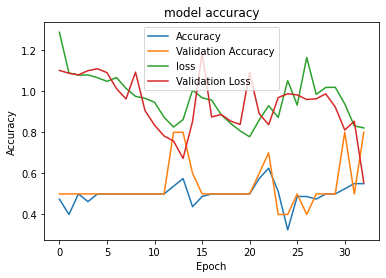

In [183]:
import matplotlib.pyplot as plt
plt.plot(lizon.history["accuracy"])
plt.plot(lizon.history['val_accuracy'])
plt.plot(lizon.history['loss'])
plt.plot(lizon.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [41]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen= ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow(train_x,train_y, batch_size=32)
val_gen = val_datagen.flow(eval_x,eval_y, batch_size=32)
test_gen = val_datagen.flow(test_x,test_y, batch_size =32, shuffle = False)

In [43]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=val_gen.n//val_gen.batch_size
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size
ep = 100
classifier.fit_generator(generator = train_gen, validation_data= val_gen,
                           steps_per_epoch=STEP_SIZE_TRAIN, epochs=ep, 
                           validation_steps=STEP_SIZE_VALID)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2/2 [==============================] - 1s 260ms/step - loss: 13.1706 - accuracy: 0.4531
Epoch 2/100
2/2 [==============================] - 0s 240ms/step - loss: 4.7036 - accuracy: 0.2812
Epoch 3/100
2/2 [==============================] - 0s 129ms/step - loss: 2.4718 - accuracy: 0.3125
Epoch 4/100
2/2 [==============================] - 0s 234ms/step - loss: 2.6478 - accuracy: 0.3281
Epoch 5/100
2/2 [==============================] - 0s 132ms/step - loss: 1.4242 - accuracy: 0.5208
Epoch 6/100
2/2 [==============================] - 0s 234ms/step - loss: 2.0586 - accuracy: 0.3750
Epoch 7/100
2/2 [==============================] - 0s 235ms/step - loss: 1.7608 - accuracy: 0.4688
Epoch 8/100
2/2 [==============================] - 0s 131ms/step - loss: 1.4726 - accuracy: 0.4167
Epoch 9/100
2/2 [==============================] - 0s 127ms/step - loss: 1.5628 - accuracy: 0.2708
Epoch 10/100
2/2 [==============

In [184]:
#Once the model is trained we can evaluate it on Test data.

# Evaluating the model 
alexscore = model.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', alexscore[0])
print('Test accuracy:', alexscore[1])

Test Loss: 0.43827977776527405
Test accuracy: 0.800000011920929


In [186]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), Y_pred))

                 precision    recall  f1-score   support

   class 0(car)       0.00      0.00      0.00         2
  class 1(bike)       1.00      1.00      1.00         3
class 2(random)       0.71      1.00      0.83         5

       accuracy                           0.80        10
      macro avg       0.57      0.67      0.61        10
   weighted avg       0.66      0.80      0.72        10



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

In [187]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [188]:
#vgg16
vggmodel = Sequential()
vggmodel.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [189]:
vggmodel.add(Flatten())
vggmodel.add(Dense(units=500,activation="relu"))
keras.layers.Dropout(0.2)
vggmodel.add(Dense(units=500,activation="relu"))
keras.layers.Dropout(0.2)
vggmodel.add(Dense(units=3, activation="softmax"))

In [190]:
vggmodel.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 64, 64, 256)     

In [191]:
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)
vggmodel.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [193]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

vgg=vggmodel.fit(train_x,train_y,batch_size = 32,epochs=200,verbose=1,validation_data=(eval_x, eval_y))
vgg

Epoch 1/200


ValueError: ignored

In [142]:
#Once the model is trained we can evaluate it on Test data.

# Evaluating the model 
vggscore = vggmodel.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', vggscore[0])
print('Test accuracy:', vggscore[1])

Test Loss: 2.089756727218628
Test accuracy: 0.8999999761581421


In [143]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = vggmodel.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))

                 precision    recall  f1-score   support

   class 0(car)       0.67      1.00      0.80         2
  class 1(bike)       1.00      1.00      1.00         2
class 2(random)       1.00      0.83      0.91         6

       accuracy                           0.90        10
      macro avg       0.89      0.94      0.90        10
   weighted avg       0.93      0.90      0.91        10

[[2 0 0]
 [0 2 0]
 [1 0 5]]


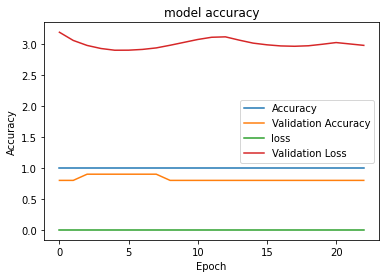

In [144]:
import matplotlib.pyplot as plt
plt.plot(vgg.history["accuracy"])
plt.plot(vgg.history['val_accuracy'])
plt.plot(vgg.history['loss'])
plt.plot(vgg.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [194]:
#lenet
lenet_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='same'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='relu'), #C5
    keras.layers.Dense(84, activation='relu'), #F6
    keras.layers.Dense(3, activation='softmax') #Output layer
])

In [195]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
lenet_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [196]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("lenet_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

lenet=lenet_model.fit(train_x,train_y,batch_size = 32,epochs=100,verbose=1,validation_data=(eval_x, eval_y),callbacks=[checkpoint,early])
lenet

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.3111 - accuracy: 0.3500
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to lenet_1.h5
3/3 [==============================] - 0s 104ms/step - loss: 1.3111 - accuracy: 0.3500 - val_loss: 0.8845 - val_accuracy: 0.5000
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 0.9797 - accuracy: 0.5000
Epoch 00002: val_accuracy did not improve from 0.50000
3/3 [==============================] - 0s 11ms/step - loss: 0.9363 - accuracy: 0.5000 - val_loss: 0.8203 - val_accuracy: 0.5000
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 0.8936 - accuracy: 0.4688
Epoch 00003: val_accuracy did not improve from 0.50000
3/3 [==============================] - 0s 11ms/step - loss: 0.8108 - accuracy: 0.6000 - val_loss: 0.9397 - val_accuracy: 0.5000
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.7526 - accuracy: 0.5000
Epoch 00004: val_accuracy improved from 0.50000 t

In [197]:
#Once the model is trained we can evaluate it on Test data.

# Evaluating the model 
lenetscore = lenet_model.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', lenetscore[0])
print('Test accuracy:', lenetscore[1])

Test Loss: 0.08363452553749084
Test accuracy: 1.0


In [198]:
from sklearn.metrics import classification_report,confusion_matrix
lenet_pred = classifier.predict(test_x)
y_pred = np.argmax(lenet_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))

                 precision    recall  f1-score   support

   class 0(car)       1.00      0.50      0.67         2
  class 1(bike)       1.00      1.00      1.00         3
class 2(random)       0.83      1.00      0.91         5

       accuracy                           0.90        10
      macro avg       0.94      0.83      0.86        10
   weighted avg       0.92      0.90      0.89        10

[[1 0 1]
 [0 3 0]
 [0 0 5]]


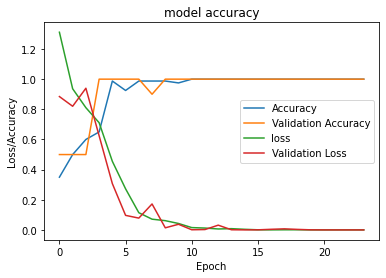

In [200]:
import matplotlib.pyplot as plt
plt.plot(lenet.history["accuracy"])
plt.plot(lenet.history['val_accuracy'])
plt.plot(lenet.history['loss'])
plt.plot(lenet.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()